# Anime dataset analysis

In [2]:
#importing neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
df=pd.read_csv('anime.csv')

In [4]:
df.head(5)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
anime_id    12294 non-null int64
name        12294 non-null object
genre       12232 non-null object
type        12269 non-null object
episodes    12294 non-null object
rating      12064 non-null float64
members     12294 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
df.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [7]:
df.dropna(subset=['rating'],inplace=True) # dropping rows which has no rating value

In [8]:
df.isna().sum()

anime_id     0
name         0
genre       47
type         0
episodes     0
rating       0
members      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12064 entries, 0 to 12293
Data columns (total 7 columns):
anime_id    12064 non-null int64
name        12064 non-null object
genre       12017 non-null object
type        12064 non-null object
episodes    12064 non-null object
rating      12064 non-null float64
members     12064 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 754.0+ KB


#### changing datatype of episode attribute and replacing 'unknown' value to 0

In [10]:
df['episodes']=df['episodes'].apply(lambda x: int(x) if x!='Unknown' else 0) 
df['episodes'].dtype

dtype('int64')

In [11]:
df.describe().drop('anime_id',axis=1)

,episodes,rating,members
count,12064.000000,12064.000000,1.206400e+04
mean,12.253316,6.473902,1.827952e+04
std,46.668767,1.026746,5.527578e+04
min,0.000000,1.670000,1.200000e+01
25%,1.000000,5.880000,2.210000e+02
50%,2.000000,6.570000,1.539000e+03
75%,12.000000,7.180000,9.485500e+03
max,1818.000000,10.000000,1.013917e+06


#### top 5 highest rated anime

In [12]:
df.sort_values('rating',ascending=False).head(5)

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,0,9.60,47
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44


#### top 5 anime which has highest members

In [13]:
df.sort_values('members',ascending=False).head(5)

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796


#### top 5 anime which has rating greator than 9 and has more than 100k members

In [14]:
df[(df['rating']>9) & (df['members']>100000)].head(5)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


From above information, we can conclude that 'Kimi no Na wa' anime movie is highest rated in any category which has more than 100k members and 'Fullmetal Alchemist: Brotherhood' is highest rated anime series which has more than 100k members.

#### show which has maximum number of episodes

In [15]:
df[df['episodes']==df['episodes'].max()]

,anime_id,name,genre,type,episodes,rating,members
6296,12393,Oyako Club,"Comedy, Slice of Life",TV,1818,6.18,160


#### total number of anime shows/movies in each category/type

In [16]:
gb=df.groupby('type')["anime_id"].count()
gb
# OVA stands for 'Original video animation' and ONA stands for 'Original net animation'

type
Movie      2297
Music       488
ONA         652
OVA        3285
Special    1671
TV         3671
Name: anime_id, dtype: int64

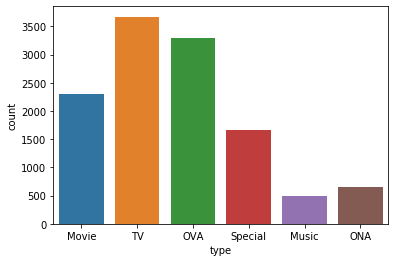

In [17]:
sns.countplot(x='type',data=df)